In [55]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing 
from keras import models, layers, optimizers
import matplotlib.pyplot as plt

In [57]:
X_test = pd.read_csv('abalone_test.csv')

In [58]:
X_train = pd.read_csv('abalone_train.csv')

In [59]:
X_test.head()

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad,modelo_2,modelo_3
0,M,0.430,0.330,0.095,0.340,0.1315,0.085,0.1120,14,16.98,15.13
1,F,0.455,0.365,0.110,0.385,0.1660,0.046,0.1345,13,20.73,16.38
2,I,0.495,0.380,0.145,0.515,0.1750,0.098,0.2120,13,18.43,13.51
3,F,0.480,0.380,0.145,0.590,0.2320,0.141,0.2300,12,17.72,14.71
4,I,0.470,0.400,0.160,0.510,0.1615,0.073,0.1980,14,17.66,16.27


In [60]:
X_test.shape

(835, 11)

In [61]:
X_train.head()

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
0,M,0.620,0.490,0.155,1.1000,0.5050,0.2475,0.3100,9
1,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,9
2,M,0.600,0.475,0.175,1.1100,0.5105,0.2560,0.2850,9
3,I,0.340,0.255,0.075,0.1800,0.0745,0.0400,0.0525,6
4,F,0.670,0.505,0.205,1.3645,0.6075,0.3025,0.3530,9


In [62]:
X_train.shape

(3342, 9)

In [63]:
X_train[['sexo_F', 'sexo_I', 'sexo_M']] = pd.get_dummies(X_train['sexo'])


In [64]:
X_test[['sexo_F', 'sexo_I', 'sexo_M']] = pd.get_dummies(X_test['sexo'])

In [65]:
X_train.head()

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad,sexo_F,sexo_I,sexo_M
0,M,0.620,0.490,0.155,1.1000,0.5050,0.2475,0.3100,9,0,0,1
1,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,9,0,1,0
2,M,0.600,0.475,0.175,1.1100,0.5105,0.2560,0.2850,9,0,0,1
3,I,0.340,0.255,0.075,0.1800,0.0745,0.0400,0.0525,6,0,1,0
4,F,0.670,0.505,0.205,1.3645,0.6075,0.3025,0.3530,9,1,0,0


In [66]:
X_test.head()

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad,modelo_2,modelo_3,sexo_F,sexo_I,sexo_M
0,M,0.430,0.330,0.095,0.340,0.1315,0.085,0.1120,14,16.98,15.13,0,0,1
1,F,0.455,0.365,0.110,0.385,0.1660,0.046,0.1345,13,20.73,16.38,1,0,0
2,I,0.495,0.380,0.145,0.515,0.1750,0.098,0.2120,13,18.43,13.51,0,1,0
3,F,0.480,0.380,0.145,0.590,0.2320,0.141,0.2300,12,17.72,14.71,1,0,0
4,I,0.470,0.400,0.160,0.510,0.1615,0.073,0.1980,14,17.66,16.27,0,1,0


In [67]:
X_test= X_test.drop(columns=['modelo_2','modelo_3'],axis=0)

In [68]:
X_test.columns

Index(['sexo', 'longitud', 'diametro', 'altura', 'peso_entero',
       'peso_sin_cascara', 'peso_visceras', 'peso_cascara', 'edad', 'sexo_F',
       'sexo_I', 'sexo_M'],
      dtype='object')

In [69]:
y_train = X_train['edad'].values
X_train = X_train.drop(columns=['edad','sexo']).values

y_test = X_test['edad'].values
X_test = X_test.drop(columns=['edad','sexo']).values

In [70]:
y_train.shape,X_train.shape

((3342,), (3342, 10))

In [71]:
y_test.shape , X_test.shape

((835,), (835, 10))

In [72]:
y_train

array([ 9,  9,  9, ...,  9, 14, 22])

In [73]:
X_train

array([[0.62 , 0.49 , 0.155, ..., 0.   , 0.   , 1.   ],
       [0.475, 0.375, 0.11 , ..., 0.   , 1.   , 0.   ],
       [0.6  , 0.475, 0.175, ..., 0.   , 0.   , 1.   ],
       ...,
       [0.605, 0.47 , 0.165, ..., 1.   , 0.   , 0.   ],
       [0.665, 0.535, 0.155, ..., 0.   , 0.   , 1.   ],
       [0.545, 0.42 , 0.14 , ..., 0.   , 0.   , 1.   ]])

In [74]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])


In [77]:
history = model.fit(X_train,y_train,epochs = 30)

Epoch 1/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7400 - mae: 1.5666
Epoch 2/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7652 - mae: 1.5663
Epoch 3/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7579 - mae: 1.5616
Epoch 4/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7684 - mae: 1.5656
Epoch 5/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7199 - mae: 1.5569
Epoch 6/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7498 - mae: 1.5613
Epoch 7/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7448 - mae: 1.5618
Epoch 8/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7067 - mae: 1.5586
Epoch 9/30
105/105 [==============================] - 0s 1ms/step - loss: 4.7470 - mae: 1.5643
Epoch 10/30
105/105 [==============================] - 0s 1ms/step - loss: 4.6785 - mae: 1.5521
Epoch 11/30
105/105 [============================

In [78]:
history_dict = history.history

In [79]:
history_dict

{'loss': [4.739972114562988,
  4.765169620513916,
  4.757853031158447,
  4.768434047698975,
  4.719891548156738,
  4.749773025512695,
  4.7448272705078125,
  4.706721782684326,
  4.747025966644287,
  4.6784796714782715,
  4.730084419250488,
  4.707076072692871,
  4.73545503616333,
  4.724950790405273,
  4.715169429779053,
  4.695408821105957,
  4.7056756019592285,
  4.668511867523193,
  4.715515613555908,
  4.6891703605651855,
  4.672389030456543,
  4.643216133117676,
  4.678995609283447,
  4.679811477661133,
  4.700896739959717,
  4.67806339263916,
  4.695202827453613,
  4.684671401977539,
  4.658215522766113,
  4.665911674499512],
 'mae': [1.5665737390518188,
  1.5663396120071411,
  1.5616400241851807,
  1.5655652284622192,
  1.5568821430206299,
  1.5613235235214233,
  1.5617872476577759,
  1.5586203336715698,
  1.564274787902832,
  1.5521422624588013,
  1.5621813535690308,
  1.5488580465316772,
  1.5611827373504639,
  1.554557204246521,
  1.5498778820037842,
  1.5583205223083496,
  

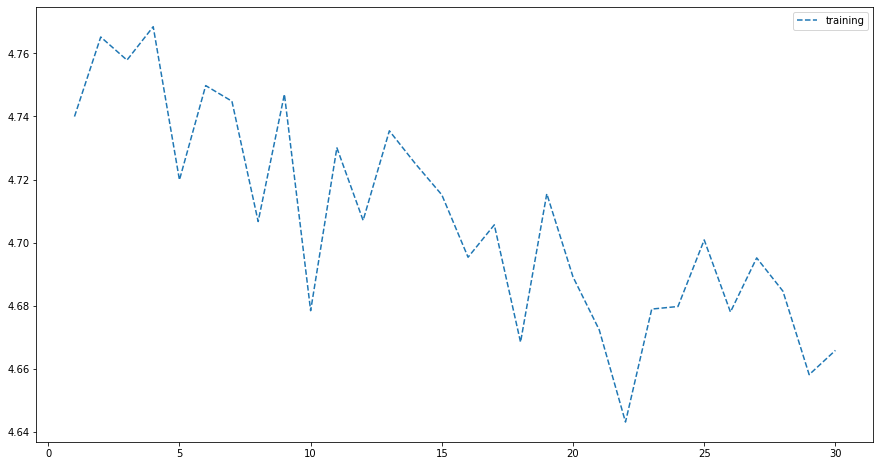

In [89]:
import matplotlib.pyplot as plt

#history_dict = history.history
loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(15,8))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,'--',label = 'training')
#plt.plot(epoch,val_loss_values,'--',label = 'validation')
plt.legend()
plt.show()

In [86]:
predictions = model.predict(X_test)

27/27 [==============================] - 0s 880us/step


In [87]:
predictions[3]

array([11.957386], dtype=float32)

In [88]:
y_test[2]

13

In [41]:
test_loss,test_mae = model.evaluate(X_test,y_test)

27/27 [==============================] - 0s 1ms/step - loss: 3.4523 - mae: 1.3452


In [42]:
print(test_loss,test_mae)

3.452256441116333 1.3452030420303345
